![alt text](image.png)

[Dataset](https://www.kaggle.com/datasets/aljarah/xAPI-Edu-Data)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Завантаження даних
df = pd.read_csv("..\\data\\xAPI-Edu-Data.csv")

# Перевірка на пропущені значення
print(df.isnull().sum())

# Видалення пропущених значень (за потреби)
df.dropna(inplace=True)

# Масштабування числових ознак
scaler = StandardScaler()
numerical_columns = ['raisedhands', 'VisITedResources', 'AnnouncementsView', 'Discussion']
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
df.head()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64


,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,-1.033429,-1.174075,-1.351167,-0.843326,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,-0.870813,-1.053029,-1.313549,-0.662225,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,-1.196046,-1.446426,-1.426401,-0.481125,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,-0.545579,-0.901723,-1.238315,-0.300024,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,-0.220346,-0.145191,-0.974994,0.243279,No,Bad,Above-7,M


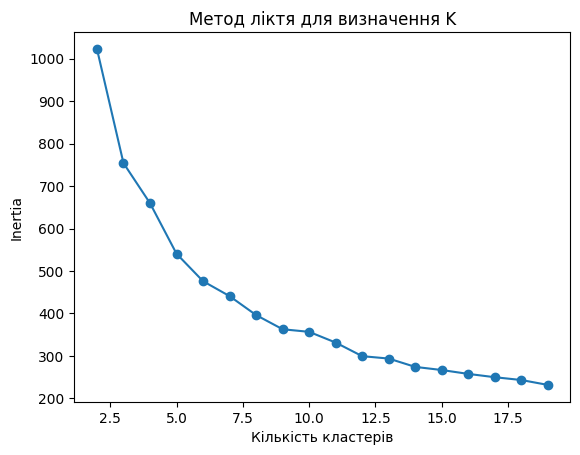

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Визначення оптимальної кількості кластерів методом "ліктя"
inertia = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[numerical_columns])
    inertia.append(kmeans.inertia_)

# Візуалізація методу "ліктя"
plt.plot(range(2, 20), inertia, marker='o')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.title('Метод ліктя для визначення K')
plt.show()

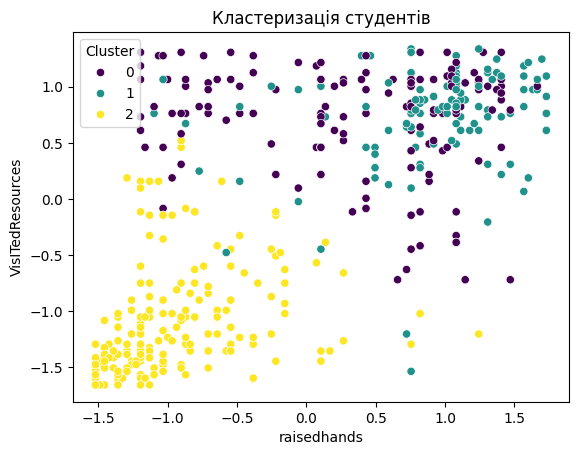

Коефіцієнт силуету: 0.36012219775118254


In [3]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[numerical_columns])

sns.scatterplot(x=df['raisedhands'], y=df['VisITedResources'], hue=df['Cluster'], palette='viridis')
plt.title('Кластеризація студентів')
plt.show()

silhouette_avg = silhouette_score(df[numerical_columns], df['Cluster'])
print(f'Коефіцієнт силуету: {silhouette_avg}')

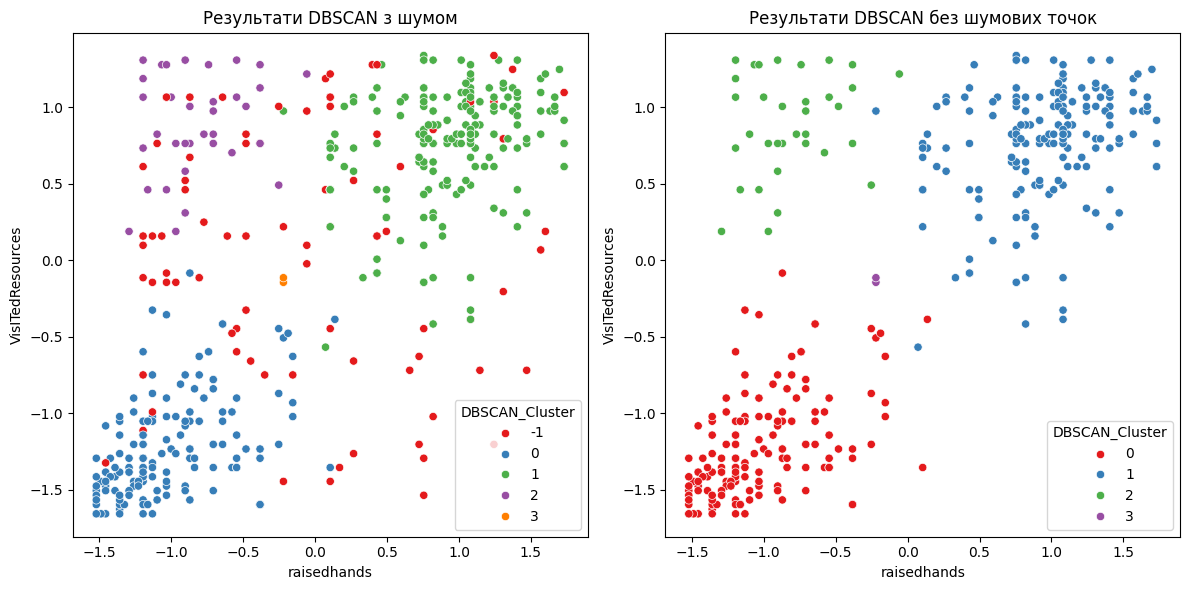

Коефіцієнт силуету для DBSCAN: 0.2063911008124795


In [4]:
from sklearn.cluster import DBSCAN

# Виконання DBSCAN
dbscan = DBSCAN(eps=0.7, min_samples=10)
df['DBSCAN_Cluster'] = dbscan.fit_predict(df[numerical_columns])

# Фільтрація шумових точок
df_filtered = df[df['DBSCAN_Cluster'] != -1]

# Створення двох колонок для графіків
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Графік з шумом
sns.scatterplot(x=df['raisedhands'], y=df['VisITedResources'], hue=df['DBSCAN_Cluster'], palette='Set1', ax=axes[0])
axes[0].set_title('Результати DBSCAN з шумом')

# Графік без шумових точок
sns.scatterplot(x=df_filtered['raisedhands'], y=df_filtered['VisITedResources'], hue=df_filtered['DBSCAN_Cluster'], palette='Set1', ax=axes[1])
axes[1].set_title('Результати DBSCAN без шумових точок')

# Показати графіки
plt.tight_layout()
plt.show()

silhouette_avg_dbscan = silhouette_score(df_filtered[numerical_columns], df_filtered['DBSCAN_Cluster'])
print(f'Коефіцієнт силуету для DBSCAN: {silhouette_avg_dbscan}')